# Stock Visualization

In [48]:
# imports
import pandas as pd
from matplotlib import pyplot as plot


# class to visualize stock price via graphs
class Visualize_Stocks:
    
    # initialize parameters
    def __init__(self, stock_one, file_path_one, desired_variable, time_period,
                 stock_two = None, file_path_two = None):
        self._stock_one = stock_one
        self._file_path_one = file_path_one
        self._desired_variable = desired_variable
        self._time_period = time_period
        self._stock_two = stock_two
        self._file_path_two = file_path_two
        self._isTwoStocks = False
        
        # see if there are two stocks given to plot
        if (file_path_two != None) and (stock_two != None):
            self._isTwoStocks = True
            
    
    # main method
    def main(self):
        # if only one stock input
        if self._isTwoStocks == False:
            plot = self._graph_one_stock(self._stock_one, self._file_path_one, self._desired_variable, self._time_period)
        else:
            plot = self._graph_two_stocks(self._stock_one, self._file_path_one, self._desired_variable, self._time_period,
                                          self._stock_two, self._file_path_two)
            
        plot.show()
     
    
    ###########################################################################
    #####
    ##### method to graph one stock
    ##### 
    ##### @param stock - the stock symbol
    ##### @param path - the path to the stock price data
    ##### @param variable - the variable to look at in the data [ex. 'Close']
    ##### @param period - the time period of the data
    #####
    ###########################################################################
    def _graph_one_stock(self, stock, path, variable, period):
        # read data
        data = pd.read_csv(path, usecols = ['Date', desiredVar])
        
        # get key variable values
        yLabel = variable + ' Price'
        beginPrice = data[variable][0]
        closePrice = data[desiredVar][len(data) - 1]
        averagePrice = data[variable].mean()
        minPriceY = min(data[variable])
        maxPriceY = max(data[variable])
        
        # find min and max indices
        for index in range(len(data)):
            minIndexFound = False
            maxIndexFound = False
            if data[variable][index] == minPriceY:
                minPriceX = index
                minPriceDate = data['Date'][index]
                minIndexFound = True
            if data[variable][index] == maxPriceY:
                maxPriceX = index
                maxPriceDate = data['Date'][index]
                maxIndexFound = True
            if (minIndexFound == True) and (maxIndexFound == True):
                break
        
        # plot points    
        data.plot(kind = 'line', 
                      x = 'Date', 
                      y = variable, 
                      color = 'blue',
                      title = '{0} Price for Last {1}'.format(stock, period),
                      xlabel = 'Date', 
                      ylabel = yLabel,
                      legend = False)

        # plot beginning price line
        plot.axhline(y = beginPrice, 
                     color = 'orange', 
                     linestyle = 'dotted',
                     label = 'Open Price: {0}'.format(round(beginPrice, 2)))
        
        # plot close price line
        plot.axhline(y = closePrice, 
                     linestyle = 'none',
                     label = 'Close Price: {0}'.format(round(closePrice, 2)))

        # plot average price line
        plot.axhline(y = averagePrice, 
                     linestyle = 'none',
                     label = 'Average Price: {0}'.format(round(averagePrice, 2)))

        # plot points for max and min prricees
        plot.plot(maxPriceX, maxPriceY, color = 'green', marker=".", markersize = 15, label = 'Max Price: {0} [{1}]'.format(round(maxPriceY, 2), maxPriceDate))
        plot.plot(minPriceX, minPriceY, color = 'red', marker=".", markersize = 15, label = 'Min Price: {0} [{1}]'.format(round(minPriceY, 2), minPriceDate))

        plot.legend(bbox_to_anchor = (1, 1))
        
        return plot
        
        
    ################################################################################
    #####
    ##### method to graph two stocks
    ##### 
    ##### @param stockOne - the stock symbol of the first stock
    ##### @param pathOne - the path to the stock price data of the first stock
    ##### @param variable - the variable to look at in the data [ex. 'Close']
    ##### @param period - the time period of the data
    ##### @param stockTwo - the stock symbol of the second stock
    ##### @param pathTwo - the path to the stock price data of the second stock
    #####
    ################################################################################
    def _graph_two_stocks(self, stockOne, pathOne, variable, period, stockTwo, pathTwo):
        # read data
        data = pd.read_csv(pathOne, usecols = ['Date', desiredVar])
        data['stockTwoVals'] = pd.read_csv(pathTwo, usecols = [desiredVar])
        
        # get key variable values
        closePriceOne = data[desiredVar][len(data) - 1]
        closePriceTwo = data['stockTwoVals'][len(data) - 1]
        avgPriceOne = data[desiredVar].mean()
        avgPriceTwo = data['stockTwoVals'].mean()
        

        # determine colors of stock lines
        colors = ['red', 'green']
        if closePriceOne > closePriceTwo:
            colors = ['green', 'red']

        # plot the data
        data.plot(x = 'Date', 
                  y = [desiredVar, 'stockTwoVals'],
                  label = [stockOne, stockTwo],
                  color = colors)

        plot.title('{0} Price for Last {1}: {2} v. {3}'.format(desiredVar, timePeriod, stockOne, stockTwo))
        plot.xlabel('Date')
        plot.ylabel(desiredVar + ' Price')

        # plot close price line [one]
        plot.axhline(y = closePriceOne, 
                     linestyle = 'dashed',
                     color = colors[0],
                     label = 'Close Price {0}: {1}'.format(stockOne, round(closePriceOne, 2)))

        # plot close price line [two]
        plot.axhline(y = closePriceTwo, 
                     linestyle = 'dashed',
                     color = colors[1],
                     label = 'Close Price {0}: {1}'.format(stockTwo, round(closePriceTwo, 2)))
        
        # plot average price line [one]
        plot.axhline(y = avgPriceOne, 
                     linestyle = 'dotted',
                     color = colors[0],
                     label = 'Average Price {0}: {1}'.format(stockOne, round(avgPriceOne, 2)))
        
        # plot average price line [two]
        plot.axhline(y = avgPriceTwo, 
                     linestyle = 'dotted',
                     color = colors[1],
                     label = 'Average Price {0}: {1}'.format(stockTwo, round(avgPriceTwo, 2)))

        plot.legend(bbox_to_anchor = (1, 1))
        
        return plot

<module 'matplotlib.pyplot' from '/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

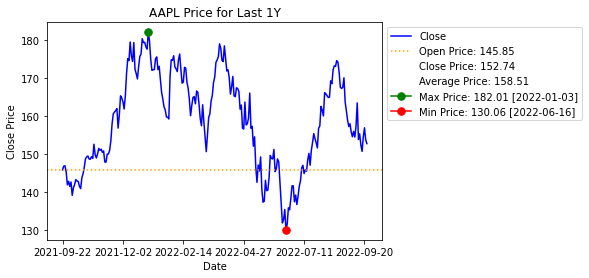

In [49]:
path = '/Users/mtjen/Desktop/395/AAPL.csv'
stockSymbol = 'AAPL'
timePeriod = '1Y'
desiredVar = 'Close'

vizTest = Visualize_Stocks(stockSymbol, path, desiredVar, timePeriod)
vizTest._graph_one_stock(stockSymbol, path, desiredVar, timePeriod)

<module 'matplotlib.pyplot' from '/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

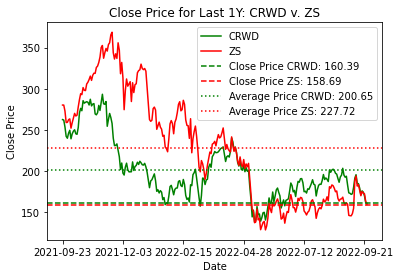

In [53]:
path = '/Users/mtjen/Desktop/395/CRWD.csv'
stockSymbol = 'CRWD'
timePeriod = '1Y'
desiredVar = 'Close'
pathTwo = '/Users/mtjen/Desktop/395/ZS.csv'
stockSymbolTwo = 'ZS'

vizTwo = Visualize_Stocks(stockSymbol, path, desiredVar, timePeriod, stockSymbolTwo, pathTwo)
vizTwo._graph_two_stocks(stockSymbol, path, desiredVar, timePeriod, stockSymbolTwo, pathTwo)

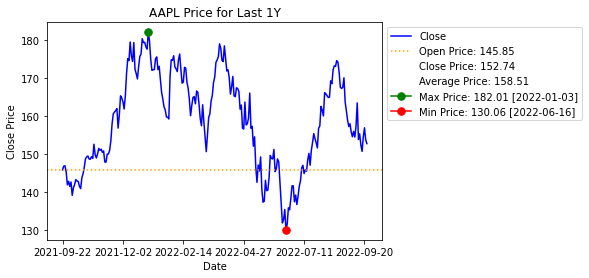

In [54]:
vizTest.main()

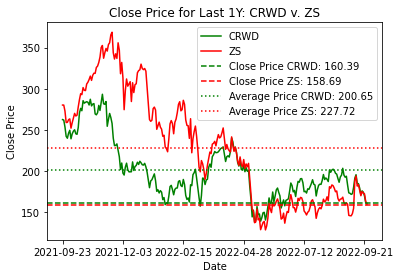

In [55]:
vizTwo.main()

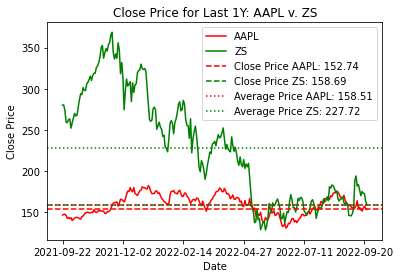

In [56]:
path = '/Users/mtjen/Desktop/395/AAPL.csv'
stockSymbol = 'AAPL'
timePeriod = '1Y'
desiredVar = 'Close'
pathTwo = '/Users/mtjen/Desktop/395/ZS.csv'
stockSymbolTwo = 'ZS'

vizTest = Visualize_Stocks(stockSymbol, path, desiredVar, timePeriod, stockSymbolTwo, pathTwo)
vizTest.main()